## Project Title
# Instacart - Supermarket

# Project description

Instacart is a grocery delivery platform where customers can place a grocery order and receive the purchase at home, similar to how Uber Eats and iFood work.

# Data description

There are five tables in the dataset, and you will need to use all of them to preprocess the data and perform AED. Below is a dictionary that lists the columns of each table and describes the data contained in them.

- `instacart_orders.csv`: each row corresponds to an order in the Instacart app
    - `'order_id'`: is the unique identification number of each order
    - `'user_id'`:  is the unique identification number of each customer's account
    - `'order_number'`: is the number of times the customer has placed an order
    - `'order_dow'`: is the day of the week the order was placed (0 is Sunday)
    - `'order_hour_of_day'`: is the time of day the order was placed
    - `'days_since_prior_order'`: is the number of days since the customer placed their previous order




- `products.csv`: each row corresponds to a unique product that customers can purchase
    - `'product_id'`: is the unique identification number of each product
    - `'product_name'`: is the name of the product
    - `'aisle_id'`: is the unique identification number of each grocery aisle category
    - `'department_id'`: is the unique identification number of each grocery department category



-	`order_products.csv`: each row corresponds to an item included in an order
    -	`'order_id'`: is the unique identification number of each order
    -	`'product_id'`: is the unique identification number of each product
    -	`'add_to_cart_order'`: is the sequential order in which each item was added to the cart
    -	`'reordered'`: 0 if the customer has never purchased the product before, 1 if they have




-	`aisles.csv`
    -	`'aisle_id'`: is the unique identification number of each grocery aisle category
    -	`'aisle'`: is the name of the aisle



-	`departments.csv`
    -	`'department_id'`: is the unique identification number of each grocery department category
    -	`'department'`: is the name of the department


## Importing the libraries

In [40]:
# Importing the libraries
import pandas as pd

##  Loading the dataset

In [41]:
# Loading the dataset
df_instacart_orders = pd.read_csv('instacart_orders.csv', sep=';')
df_products = pd.read_csv('products.csv', sep=';')
df_aisles = pd.read_csv('aisles.csv', sep=';')
df_departments = pd.read_csv('departments.csv', sep=';')
df_order_products = pd.read_csv('order_products.csv', sep=';')

In [42]:
df_vcount = df_order_products['product_id'].value_counts().head(10).reset_index()
df_vcount.columns = ['product_id', 'count']

df_results = pd.merge(df_vcount, df_products[['product_id', 'product_name']], on='product_id')
df_results

,product_id,count,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


In [43]:
#  Print the information about the dataset df_instacart_orders
df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Note: Within df_instacart there are missing values ​​in days_since_pior_order.

In [44]:
#  Print the information about the dataset df_products
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Note: Within df_products there are missing values ​​in product_name.

In [45]:
#  Print the information about the dataset df_aisles
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


Note: In df_aisles all values ​​are filled in

In [46]:
#  Print the information about the dataset df_departments
df_departments.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


Note: In df_departments all values ​​are filled in

In [47]:
#  Print the information about the dataset df_order_products
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


Note: In df_order_products we have missing values ​​in add_to_cart_order

##  Conclusions when loading the dataset

When using the info() method I was able to conclude that there are missing values ​​in the "df_instacart, df_products and df_order_products" datasets, whereas in the "df_aisles and df_departments" datasets all values ​​are filled in

## Data preparation

# df_instacart_orders

In [48]:
# checking for duplicate orders
df_instacart_orders[df_instacart_orders.duplicated()].shape[0]

15

In [49]:
df_instacart_orders[df_instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Note: There are duplicate data and they have something in common, the duplicate data is linked to the same day and the same time.

In [50]:
# Checking all orders placed at 2am on Wednesdays.
df_instacart_orders[(df_instacart_orders['order_hour_of_day'] == 2) & (df_instacart_orders['order_dow'] == 3)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


Note: The Instacart application may have presented some instability or failure as all duplicate values are on the same day (day 3) and at the same time of day (time 2:00).

In [51]:
# Deleting duplicate orders
df_instacart_orders.reset_index(drop=True, inplace=True)

In [52]:
# Checking for duplicate rows again
df_instacart_orders[df_instacart_orders.duplicated()].shape[0]

15

In [53]:
# Checking again only the duplicate order IDs.
df_instacart_orders[df_instacart_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


# Conclusion after preparing the dataset df_instacart_orders data.

By modifying the instacart_orders data and removing duplicates, it is possible to observe a significant improvement in the analysis, as there are no longer duplicated values that could complicate the analysis of the days customers placed their orders and the busiest hours.

# df_products

In [54]:
df_products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [55]:
# Checking for duplicated rows
df_products[df_products.duplicated()].shape[1]

4

In [56]:
# Checking for duplicate product ID´s.
duplicated_products_ids = df_products[df_products.duplicated(subset=['department_id'])]

In [57]:
# Converting names to lowercase
df_products['product_name_lower'] = df_products['product_name'].str.lower()

In [58]:
# Checking for duplicate product names that are not missing
duplicated_products_not_missing = df_products[df_products.duplicated(subset=['product_name_lower'], keep=False) & ~df_products['product_name_lower'].isnull()]

In [59]:
duplicated_products_not_missing

,product_id,product_name,aisle_id,department_id,product_name_lower
41,42,Biotin 1000 mcg,47,11,biotin 1000 mcg
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17,fresh scent dishwasher detergent with dawn
515,516,American Cheese Slices,21,16,american cheese slices
1538,1539,Cauliflower head,83,4,cauliflower head
1783,1784,NUTrition Protein Mix Blueberry Nut,117,19,nutrition protein mix blueberry nut
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


# Conclusion after preparing the dataset df_products data.
In products we locate the duplicates and convert the column with the product names to lowercase to facilitate the analysis and removal of duplicates, then we use the keep=false method to locate all duplicates that are identified.

# df_departments

In [60]:
df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [61]:
# Verifique se há linhas completamente duplicadas / Checking for duplicated rows.
df_departments[df_departments.duplicated()].shape[1]

2

In [62]:
# Verifique apenas se há IDs dos produtos duplicados / Checking for duplicate product ID´s.
duplicated_department_ids = df_departments[df_departments.duplicated(subset=['department_id'])]

In [63]:
duplicated_department_ids

,department_id,department


# Conclusion after preparing the dataset df_departments data.
Only 2 rows with duplicate data were found.


# df_aisles

In [64]:
df_aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [65]:
# Checking for duplicated rows.
df_aisles[df_aisles.duplicated()].shape[1]

2

In [66]:
# Checking for duplicate product ID´s.
duplicated_aisles_ids = df_aisles[df_aisles.duplicated(subset=['aisle_id'])]

In [67]:
duplicated_aisles_ids

,aisle_id,aisle


# Conclusion after preparing the dataset df_aisles data.
Only 2 rows with duplicate data were found.

# df_order_products

In [68]:
df_order_products

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [69]:
# Checking for duplicated rows.
df_order_products[df_order_products.duplicated()].shape[1]

4

In [70]:
# Checking if there are any other complicated cases of duplicates.
complicated_order_products = df_order_products[df_order_products.duplicated(keep=False)]

In [71]:
complicated_order_products

,order_id,product_id,add_to_cart_order,reordered


# Conclusion after preparing the dataset df_order_products data.
In df_order_products it was checked if there were duplicates and then using the keep=False method I checked if there were any slightly more complicated cases with this method.

In [72]:
# Looking for missing values in column 'product_name'
df_products[df_products['product_name'].isnull()]

,product_id,product_name,aisle_id,department_id,product_name_lower
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Note: Missing values ​​when Aisle_id = 100 and Department_id = 21. I can conclude that the missing values from the df_products dataframe is linked to aisle_id and department_id.

In [73]:
# Checking if all missing product names are associated with section ID 100?
df_products[df_products['product_name'].isnull()]['aisle_id'].value_counts()

aisle_id
100    1258
Name: count, dtype: int64

Obs: Found 1258 missing values in aisle_id

In [74]:
# Are all missing product names associated with department ID 21?
df_products[df_products['product_name'].isnull()]['department_id'].value_counts()

department_id
21    1258
Name: count, dtype: int64

Obs: Found 1258 missing values in department_id

In [75]:
# Use the department and section tables to check the data for section ID 100 and department ID 21

In [76]:
df_products[df_products['aisle_id'] == 100]['department_id'] ==21

37       True
71       True
109      True
296      True
416      True
         ... 
49552    True
49574    True
49640    True
49663    True
49668    True
Name: department_id, Length: 1258, dtype: bool

Obs: Found 1258 missing values ​​related to Aisle_id and Department_id

In [77]:
# Filling in the missing product names with 'Unknown'.
df_products['product_name'].fillna('Unknown', inplace=True)

In [78]:
df_products[df_products['product_name'] == 'Unknown']

,product_id,product_name,aisle_id,department_id,product_name_lower
37,38,Unknown,100,21,NaN
71,72,Unknown,100,21,NaN
109,110,Unknown,100,21,NaN
296,297,Unknown,100,21,NaN
416,417,Unknown,100,21,NaN
...,...,...,...,...,...
49552,49553,Unknown,100,21,NaN
49574,49575,Unknown,100,21,NaN
49640,49641,Unknown,100,21,NaN
49663,49664,Unknown,100,21,NaN


Note: I selected the missing values ​​and put Unknown = unknown instead of keeping NaN = Not a number / I selected the missing values ​​and put 'Unknown' instead of keeping 'NaN'.

In [79]:
# Looking for missing values
df_instacart_orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [80]:
# Are there missing values for customers who are not placing their first order?
df_instacart_orders.groupby('order_number').head(1)['order_number']

0        11
1         5
2         4
3        56
4         2
       ... 
2281     90
2482    100
2912     96
3296     73
4275     85
Name: order_number, Length: 100, dtype: int64

Note: I found the missing values ​​and then selected the first record in each group based on the 'order_number' column.

In [81]:
# Looking for missing values
df_order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [82]:
# What are the minimum and maximum values for this column?
df_order_products.loc[:, 'add_to_cart_order'].min()

1.0

In [83]:
df_order_products.loc[:, 'add_to_cart_order'].max()

64.0

Note: First I found the missing values, then I looked for information about the minimum and maximum value of the column that has missing values.

In [84]:
# Save all order IDs with at least one missing value in 'add_to_cart_order
order_id_new = df_order_products.loc[df_order_products['add_to_cart_order'].isnull(), 'order_id']#.tolist()

In [85]:
# Do all orders with missing values contain more than 64 products?
# Group orders with missing data by order ID
# Count the number of 'product_id' in each order and check the minimum count value
df_order_products.loc[df_order_products['order_id'].isin(order_id_new), :].groupby('order_id')['product_id'].count().min()

65

Note: I created a new variable where I saved the order IDs with values and nulls and then grouped the orders and managed to conclude that all orders contained more than 64 products, including the minimum value was 65.

In [86]:
# Replace missing values ​​in column 'add_to_cart_order' with 999 and convert column to integer type
df_order_products['add_to_cart_order'].fillna('999', inplace=True)

C:\Users\B450M\AppData\Local\Temp\ipykernel_20028\311207451.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '999' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_order_products['add_to_cart_order'].fillna('999', inplace=True)


In [87]:
df_order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [88]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

Note: I replaced the missing values in df_order_products'add_to_cart_order' with '999' right after I converted it to the 'int' type

# Conclusion

Firstly I needed to understand the data, such as the characteristics of variables and missing values, then I continued with the treatment of missing values ​​where I needed to choose what to do with the missing values, remove them or replace them with some value and finally I made the Cleaning and standardizing data using good practices.

##  Data analysis (EDA)

Once the data is processed and ready, perform the following analysis:


# [A] Easy (must complete everything to pass)
1. Check that the values in the 'order_hour_of_day' and 'order_dow' columns in the orders table make sense (i.e. the values in the 'order_hour_of_day' column range from 0 to 23 and those in the 'order_dow' range from 0 to 6).
2. Create a chart that shows how many people place orders for each hour of the day.
3. Create a chart that shows what day of the week people shop.
4. Create a graph that shows how long people wait before placing their next order and comment on the minimum and maximum values.

### [A1] Check if the values make sense

In [89]:
df_instacart_orders['order_hour_of_day'].value_counts()

order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2      1004
3       770
4       765
Name: count, dtype: int64

In [90]:
df_instacart_orders['order_dow'].value_counts()

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60912
4    59810
Name: count, dtype: int64

Note: After the analysis above, I was able to obtain data regarding the time at which orders were placed and the number of orders on the days of the week.

### [A2] How many people place orders at each hour of the day?

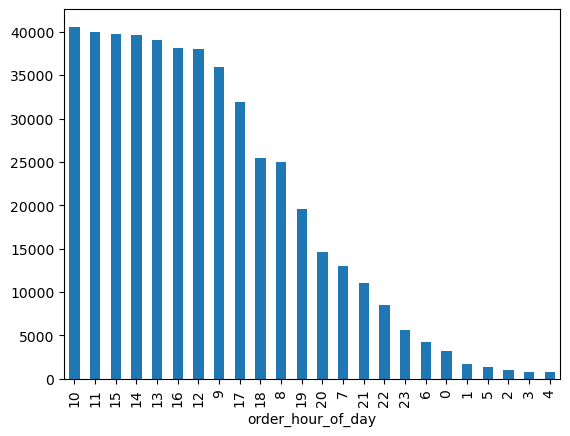

In [91]:
df_instacart_orders['order_hour_of_day'].value_counts().plot(kind='bar');

Note: In the graph above, it can be seen that from 10 am to 4 pm are the busiest times of the day as the highest number of orders are placed within these times.

### [A3] What day of the week do people shop?

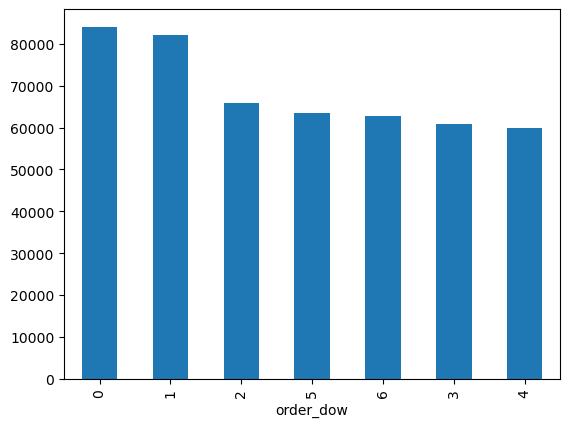

In [92]:
df_instacart_orders['order_dow'].value_counts().plot(kind='bar');

Note: In the graph above, I observed and concluded that Sunday and Monday are the busiest days and have the highest number of orders placed on these days.

### [A4] How long do people wait before placing another order?

Note: Around 15 days

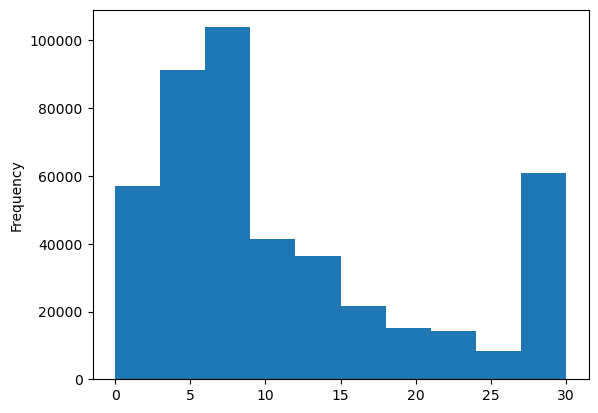

In [93]:
df_instacart_orders['days_since_prior_order'].plot(kind='hist');

# [B] Medium (must complete everything to pass)

1. Is there any difference in the distributions of `'order_hour_of_day'` on Wednesdays and Saturdays? Construct bar charts for both days on the same chart and describe the differences you noticed.
2. Construct a distribution graph for the number of orders customers place (i.e., how many customers placed just 1 order, how many placed just 2, how many placed just 3, etc.)
3. What are the 20 most frequently purchased products? Display the IDs and names.

### [B1] Differences on Wednesdays and Saturdays in 'order_hour_of_day'. Create bar charts for both days and describe the differences.

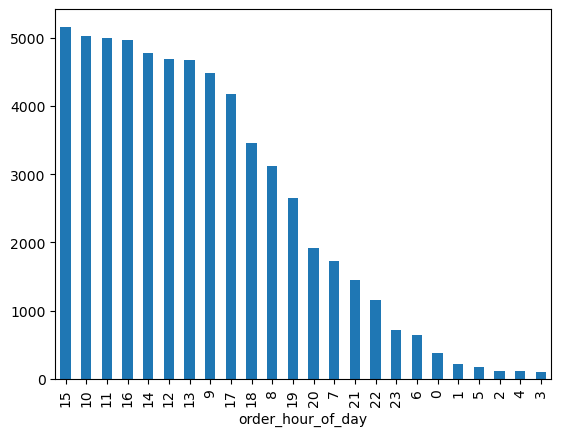

In [94]:
df_instacart_orders.loc[df_instacart_orders['order_dow'] == 3, 'order_hour_of_day'].value_counts().plot(kind='bar');

Note: On day 3 we can see that the peak of orders occurs at 3 pm.

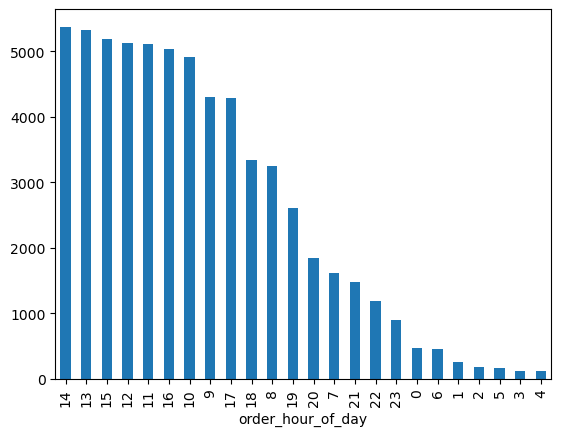

In [95]:
df_instacart_orders.loc[df_instacart_orders['order_dow'] == 6, 'order_hour_of_day'].value_counts().plot(kind='bar');

Note: On the 6th we can see that the peak of orders occurs at 2 pm.

In [96]:
df_vcount = df_order_products['product_id'].value_counts().head(20).reset_index()
df_vcount.columns = ['product_id', 'count']

df_results = pd.merge(df_vcount, df_products[['product_id', 'product_name']], on='product_id')
df_results

,product_id,count,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


Note: Above we have the list of the 20 best-selling products, with bananas being the best-selling product, followed by organic bananas.

### [B2] What is the distribution of the number of orders per customer?¶

<Axes: ylabel='Frequency'>

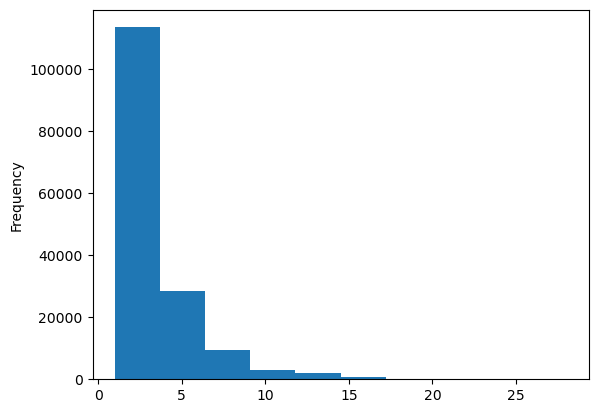

In [97]:
df_instacart_orders.groupby('user_id')['order_id'].count().plot.hist()

Note: Here we can see that most customers place only 1 order.

### [B3] What are the 20 most popular products? Display the IDs and names.

In [98]:
df_vcount = df_order_products['product_id'].value_counts().head(20).reset_index()
df_vcount.columns = ['product_id', 'count']

df_results = pd.merge(df_vcount, df_products[['product_id', 'product_name']], on='product_id')
df_results

,product_id,count,product_name
0,24852,66050,Banana
1,13176,53297,Bag of Organic Bananas
2,21137,37039,Organic Strawberries
3,21903,33971,Organic Baby Spinach
4,47209,29773,Organic Hass Avocado
5,47766,24689,Organic Avocado
6,47626,21495,Large Lemon
7,16797,20018,Strawberries
8,26209,19690,Limes
9,27845,19600,Organic Whole Milk


Note: Here we have the list of the 20 best-selling products with bananas as the best-selling product.

# [C] Hard (must complete at least two questions to pass)
1. How many items do people typically buy in one order? How is the distribution?
2. What are the top 20 items most frequently included in repeat orders? Display the IDs and names.
3. For each product, what proportion of your orders are repeat? Create a table with columns for product ID and name and the proportion of repeat orders.
4. For each customer, what proportion of all their orders are repeat?
5. What are the top 20 items that people put in their carts before everyone else? Display the product ID, name, and the number of times it was first added to a cart.

### [C1] How many items do people typically buy in one order? How is the distribution?

10


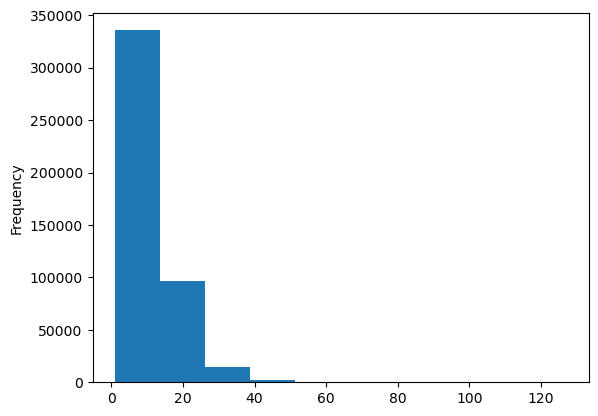

In [99]:
qtd_itens = df_order_products.groupby('order_id')['product_id'].count().sum()
qtd_pedidos = df_order_products.groupby('order_id')['product_id'].count().shape[0]

print(int(qtd_itens / qtd_pedidos))

df_order_products.groupby('order_id')['product_id'].count().plot.hist();

Note: People buy an average of 20 products.

### [C2] What are the top 20 items most frequently included in repeat orders? Display IDs and names.¶

In [100]:
df_order_products.loc[df_order_products['reordered']==1, ['product_id']].merge(df_products[['product_id', 'product_name']], on='product_id').value_counts()

product_id  product_name                                 
24852       Banana                                           55763
13176       Bag of Organic Bananas                           44450
21137       Organic Strawberries                             28639
21903       Organic Baby Spinach                             26233
47209       Organic Hass Avocado                             23629
                                                             ...  
7092        Melatonin NutraSpray Sublingual Orange Flavor        1
21003       White Chocolate Macadamia Coffee Creamer             1
32856       Crab Rangoon                                         1
42727       Chocolate Lovers Chips Deluxe Cookies                1
24091       Garlic Mill Spices                                   1
Name: count, Length: 36228, dtype: int64

Note: Bananas top the ranking of most ordered items.

### [C4] For each customer, what proportion of all their orders are repeat?

In [101]:
df_merged = df_order_products.merge(df_instacart_orders, on='order_id', how='left')
df_merged.groupby('user_id')['reordered'].mean()

df_aux = df_merged.groupby(['user_id', 'order_id'])['reordered'].mean().reset_index()
df_aux['pedido_repetido'] = df_aux['reordered'].apply(lambda x: 1 if x == 1 else 0)
df_aux.groupby(['user_id'])['pedido_repetido'].mean().mean()

0.16093538871122262

Note: We obtained a proportion of 16%.

## General conclusion of the project

Note: After carrying out all good practices with the data and carrying out some analysis of the data regarding the days of the week, time of day and best-selling products, we can observe the times when we have a greater flow of orders, the days of the week when we have more movement and best-selling products.